# Conjugate gradient

To implement Conjugate Gradient (CG) optimization on the Titanic dataset for Logistic Regression, we will follow these steps:

Logistic Regression:

Logistic regression will be used to predict the binary outcome (survived or not) based on input features.
Conjugate Gradient Method:

The Conjugate Gradient method is an iterative optimization algorithm, commonly used for solving large systems of linear equations and nonlinear optimization problems, particularly when dealing with quadratic functions.
In the case of logistic regression, the objective is to minimize the negative log-likelihood (binary cross-entropy) function.
Explanation of the Conjugate Gradient Algorithm:
The Conjugate Gradient method updates the parameters (weights and bias) in such a way that each new search direction is conjugate to the previous one, helping to ensure faster convergence.
We start with an initial guess for the parameters (weights), and iteratively update them to minimize the loss.

In [1]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    df = pd.read_csv('titanic.csv')
    df.drop(columns=['Name'], inplace=True)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Define Logistic Regression model with Conjugate Gradient optimization
class LogisticRegressionCG:
    def __init__(self, max_iter=1000, tol=1e-5):
        """
        Initialize the Logistic Regression model with Conjugate Gradient.
        - max_iter: The maximum number of iterations for optimization.
        - tol: The tolerance for convergence.
        """
        self.max_iter = max_iter
        self.tol = tol
        self.losses = []  # Store loss values for plotting

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """Compute Binary Cross-Entropy loss."""
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant to avoid log(0)
        return log_loss(y, predictions)

    def compute_gradient(self, X, y):
        """
        Compute the gradient of the loss with respect to the weights and bias.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        error = predictions - y
        
        # Gradient with respect to weights
        grad_w = np.dot(X.T, error) / len(y)
        # Gradient with respect to bias
        grad_b = np.sum(error) / len(y)
        
        return grad_w, grad_b

    def fit(self, X, y):
        """Train the Logistic Regression model using Conjugate Gradient method."""
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Initialize search direction and previous gradient
        r_w, r_b = self.compute_gradient(X, y)
        d_w, d_b = r_w.copy(), r_b.copy()
        
        # Initialize variables for CG
        for iteration in range(self.max_iter):
            # Compute the gradient
            grad_w, grad_b = self.compute_gradient(X, y)
            
            # Compute the conjugate gradient step
            rho = np.dot(r_w, r_w) + r_b**2  # rho = r^T * r
            alpha = rho / (np.dot(d_w, grad_w) + d_b * grad_b)
            
            # Update weights and bias
            self.weights -= alpha * d_w
            self.bias -= alpha * d_b
            
            # Compute new residual
            r_w_new, r_b_new = self.compute_gradient(X, y)
            beta = (np.dot(r_w_new, r_w_new) + r_b_new**2) / rho
            
            # Update search direction
            d_w = r_w_new + beta * d_w
            d_b = r_b_new + beta * d_b
            
            # Check for convergence
            if np.linalg.norm(r_w_new) + np.abs(r_b_new) < self.tol:
                break

            # Store loss for plotting
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print progress
            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Loss: {loss:.4f}")

    def predict(self, X):
        """Make predictions based on the learned weights and bias."""
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using Conjugate Gradient and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the Logistic Regression model with Conjugate Gradient
    model = LogisticRegressionCG(max_iter=1000, tol=1e-5)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Conjugate Gradient: Loss Over Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


Iteration 0, Loss: 0.5789
Iteration 100, Loss: 0.4463
Iteration 200, Loss: 0.4991
Iteration 300, Loss: 0.7859
Iteration 400, Loss: 1.7072


C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.e

Iteration 500, Loss: 26.4164
Iteration 600, Loss: 26.4163


C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_9880\2620215126.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.e

Iteration 700, Loss: 26.4162


ValueError: Input contains NaN.

# Explanation of the Code:
Data Preprocessing:

Loads the Titanic dataset and preprocesses it by converting categorical variables to numerical and scaling the features.
Logistic Regression with Momentum:

Implements Gradient Descent with Momentum to optimize the weights and bias.
Uses the momentum coefficient 
𝛽
β to accelerate convergence and avoid oscillations.
Training and Evaluation:

Trains the model and evaluates its accuracy on a test set.
Plots the loss curve over epochs to visualize convergence.

# Expected Output:
The code will print the loss every 100 epochs.
The accuracy of the model on the test set will be displayed.
A plot showing the loss over epochs will be generated to visualize how the model converges using Momentum.

Solution: [0.09090909 0.63636364]


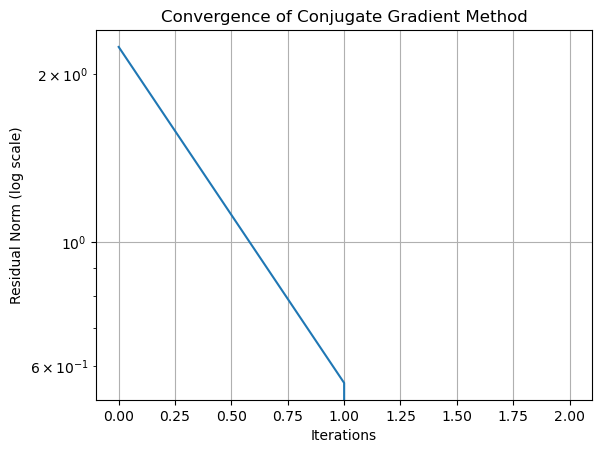

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the Quadratic Function and its Gradient
def quadratic_function(x):
    """
    Quadratic function f(x) = 0.5 * x^T A x - b^T x
    A is a symmetric positive-definite matrix, b is a vector.
    """
    A = np.array([[4, 1], [1, 3]])  # Example of a symmetric positive-definite matrix
    b = np.array([1, 2])            # Example vector
    return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b, x)

def gradient(x):
    """
    Gradient of the quadratic function: grad_f(x) = A * x - b
    """
    A = np.array([[4, 1], [1, 3]])  # Same matrix A
    b = np.array([1, 2])            # Same vector b
    return np.dot(A, x) - b

# Step 2: Implement the Conjugate Gradient Algorithm
def conjugate_gradient(A, b, x0, max_iter=1000, tol=1e-6):
    """
    Conjugate Gradient Method to solve Ax = b, where A is a symmetric positive-definite matrix.
    """
    x = x0
    r = b - np.dot(A, x)  # Initial residual
    p = r                 # Initial search direction
    rsold = np.dot(r.T, r)
    
    for i in range(max_iter):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(p.T, Ap)  # Step size
        x = x + alpha * p                 # Update the solution
        r = r - alpha * Ap                # Update the residual
        rsnew = np.dot(r.T, r)            # New residual norm
        
        if np.sqrt(rsnew) < tol:          # Convergence check
            break
        
        p = r + (rsnew / rsold) * p       # Update the search direction
        rsold = rsnew
    
    return x

# Step 3: Solve the quadratic optimization problem
A = np.array([[4, 1], [1, 3]])  # Positive-definite matrix
b = np.array([1, 2])            # Vector

# Initial guess
x0 = np.zeros_like(b)

# Solve using Conjugate Gradient
solution = conjugate_gradient(A, b, x0)

# Print the solution
print("Solution:", solution)

# Step 4: Plot the convergence of the Conjugate Gradient method
# Convergence plot: We're going to track the residual norm over iterations
def plot_convergence(A, b, x0, max_iter=1000, tol=1e-6):
    x = x0
    r = b - np.dot(A, x)  # Initial residual
    p = r                 # Initial search direction
    rsold = np.dot(r.T, r)
    
    residuals = [np.sqrt(rsold)]  # Track the residual norm for plotting
    
    for i in range(max_iter):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(p.T, Ap)  # Step size
        x = x + alpha * p                 # Update the solution
        r = r - alpha * Ap                # Update the residual
        rsnew = np.dot(r.T, r)            # New residual norm
        
        residuals.append(np.sqrt(rsnew))  # Store residual norm
        
        if np.sqrt(rsnew) < tol:          # Convergence check
            break
        
        p = r + (rsnew / rsold) * p       # Update the search direction
        rsold = rsnew
    
    # Plot the convergence
    plt.plot(residuals)
    plt.yscale('log')
    plt.xlabel('Iterations')
    plt.ylabel('Residual Norm (log scale)')
    plt.title('Convergence of Conjugate Gradient Method')
    plt.grid(True)
    plt.show()

# Plot the convergence graph
plot_convergence(A, b, x0)
